In [88]:
from bs4 import BeautifulSoup
import lxml
import re
import os
import nltk
import pandas as pd
from nltk.corpus import stopwords
from nltk.corpus import wordnet as wn
from nltk.stem.wordnet import WordNetLemmatizer
import string

### 1. Parsing and processing the English translations

In [89]:
#Sorting the files by name
translat = os.listdir('/home/nisaba/Documents/spiced_work/own_code/week11_12/etcsl/translations')
sort_translat = sorted(translat)
# I took out category 0 "Catalogues" because they have no translations and category 6:"Proverbs" because the translations are still under much debate 

In [90]:
#parsing all the transliterations and storing them all the translations in a list
etcsl_eng_words = []
for fn in sort_translat:
    content = open('/home/nisaba/Documents/spiced_work/own_code/week11_12/etcsl/translations/' + fn).read()
    etcsl_soup= BeautifulSoup(content,'xml')
    etcsl_word = etcsl_soup.find_all('body')
    for word in etcsl_word:
        etcsl_eng_words.append(word.get_text())

In [91]:
#etcsl_eng_words[0]

In [92]:
#writing the whole list of words in a txt-file
etcsl_en = open('etcsl_en', 'w')
for element in etcsl_eng_words:
    etcsl_en.write(element + "\n")
etcsl_en.close()

In [93]:
#max(etcsl_eng_words, key=len)

In [94]:
#etcsl_eng_words[0]

### 2. Preprocessing the translations

In [95]:
len(etcsl_eng_words)

377

In [96]:
len(max(etcsl_eng_words, key=len))

53224

In [97]:
type(etcsl_eng_words)

list

In [98]:
#Cleaning up the translations
etcsl_en_cleaned = []

for element in etcsl_eng_words:
    element = element.lower()
    element = re.sub(r"[\--]","",element)
    element = re.sub(r"[\(?)]","",element)
    element = re.sub(r"[\n]","",element)
    etcsl_en_cleaned.append(element)

### 3. Topic extraction and Latent Dirichlet Allocation for the whole corpus

In [13]:
from nltk.corpus import stopwords
from nltk.corpus import wordnet as wn
from nltk.stem.wordnet import WordNetLemmatizer
import string

In [167]:
stop = nltk.corpus.stopwords.words('english')
new_words= ['from', 'subject', 're', 'edu', 'use', 'said', 'makes',
            'May', 'let', 'x', 'instead', 'one', 'will', 'whose', 'brought', 'make', 'made',
            'speak', 'p2+l2', 'l1+n1', 'p4+ha', 'su1', 'p3+bt14', 'su3+su4', '7', '900', 'm', 
            'shall', 'like', 's', 'mi', 'p5', 'ms', 'mss','ms.', 'some', 'l1+n1', 'uet']
stop.extend(new_words)
exclude = set(string.punctuation)
lemma = WordNetLemmatizer()

In [15]:
#stop

In [16]:
def clean(doc):
    stop_rem = " ".join([i for i in doc.lower().split() if i not in stop])
    punc_rem = "".join(ch for ch in stop_rem if ch not in exclude)
    normalized = " ".join(lemma.lemmatize(word) for word in punc_rem.split())
    return normalized

In [17]:
etcsl_eng_cleaned = [clean(doc).split() for doc in etcsl_en_cleaned]

In [35]:
len(etcsl_eng_cleaned)

377

In /home/nisaba/anaconda3/envs/tensor/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/nisaba/anaconda3/envs/tensor/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/nisaba/anaconda3/envs/tensor/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In /home/nisaba/anaconda3/envs/tensor/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/nis

TypeError: from_bounds() argument after * must be an iterable, not int

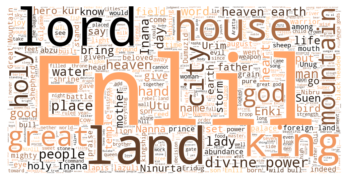

In [19]:
#Creating a wordcloud to analyze the first 

from os import path
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import os

from wordcloud import WordCloud


d = path.dirname(__file__) if "__file__" in locals() else os.getcwd()


text = open(path.join(d, 'etcsl_en.txt')).read()

stopwords = set(stop)

wc = WordCloud(width = 1000, height = 500, background_color="white", colormap="copper", max_words=1000, 
               stopwords=stopwords, contour_width=3, contour_color='black')

# generate word cloud
wc.generate(text)

# store to file
wc.to_file(path.join(d, "etcsl_1000.png"))

# show
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.figure(20, 11)
plt.imshow(cmap=plt.cm.gray, interpolation='bilinear')
plt.axis("off")
plt.show()

### 4. Preparing a document-term matrix

In [99]:
import gensim
from gensim import corpora

In [100]:
etcsl_dictionary = corpora.Dictionary(etcsl_eng_cleaned)

In [101]:
len(list(etcsl_dictionary))

13152

In [102]:
etcsl_doc_matrix = [etcsl_dictionary.doc2bow(doc) for doc in etcsl_eng_cleaned]

In [103]:
#etcsl_doc_matrix[-2]

In [104]:
#from gensim import corpora, modelstfidf = models.TfidfModel(bow_corpus)
#corpus_tfidf = tfidf[bow_corpus]

SyntaxError: invalid syntax (<ipython-input-104-c56ce094a8fa>, line 1)

### 5. Creating a Latent Dirichlet Allocation-Model 

In [82]:
Lda = gensim.models.ldamodel.LdaModel

In [83]:
lda_model = Lda(etcsl_doc_matrix, num_topics=5, id2word=etcsl_dictionary, passes=200)

In [87]:
print(lda_model.print_topics())

[(0, '0.015*"instead" + 0.011*"year" + 0.010*"house" + 0.009*"ruled" + 0.009*"you" + 0.008*"may" + 0.007*"king" + 0.007*"me" + 0.006*"water" + 0.006*"enlil"'), (1, '0.008*"lord" + 0.008*"him" + 0.007*"instead" + 0.007*"king" + 0.006*"inana" + 0.006*"see" + 0.006*"nether" + 0.005*"ninurta" + 0.005*"world" + 0.005*"son"'), (2, '0.010*"mountain" + 0.008*"may" + 0.006*"instead" + 0.006*"man" + 0.006*"city" + 0.006*"me" + 0.005*"holy" + 0.005*"son" + 0.005*"utu" + 0.005*"god"'), (3, '0.021*"great" + 0.017*"enlil" + 0.016*"may" + 0.015*"land" + 0.012*"lord" + 0.012*"holy" + 0.011*"heaven" + 0.011*"king" + 0.011*"power" + 0.010*"divine"'), (4, '0.019*"house" + 0.011*"city" + 0.007*"great" + 0.007*"land" + 0.006*"place" + 0.005*"lord" + 0.005*"inana" + 0.005*"holy" + 0.005*"enlil" + 0.005*"storm"')]


In [27]:
import pyLDAvis.gensim
pyLDAvis.enable_notebook()

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 

In [28]:
pyLDAvis.gensim.prepare(topic_model=lda_model, corpus=etcsl_doc_matrix, dictionary=etcsl_dictionary)

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
4      0.152501 -0.013937       1        1  46.853792
0      0.038675  0.010105       2        1  18.430844
1      0.011331 -0.071479       3        1  17.175024
3     -0.043628  0.125898       4        1   8.861024
2     -0.158879 -0.050586       5        1   8.679316, topic_info=          Term        Freq        Total Category  logprob  loglift
565    instead  597.000000   597.000000  Default  30.0000  30.0000
184      inana  597.000000   597.000000  Default  29.0000  29.0000
696       year  269.000000   269.000000  Default  28.0000  28.0000
6106     ruled  155.000000   155.000000  Default  27.0000  27.0000
1089  mountain  769.000000   769.000000  Default  26.0000  26.0000
...        ...         ...          ...      ...      ...      ...
417      water   43.163707   429.404707   Topic5  -5.5865   0.1468
179        him   39.232126   441.184291   Topic5  -5.6820   0.0243
1233  shepherd   36.664046   337.683675   Topic5  -5.7497   0.2239
182      house   41.033066  1022.658258   Topic5  -5.6371  -0.7716
170      heart   35.707961   470.839884   Topic5  -5.7761  -0.1349

[412 rows x 6 columns], token_table=      Topic      Freq       Term
term                            
0         1  0.051934          1
0         2  0.138490          1
0         3  0.207735          1
0         4  0.317373          1
0         5  0.288521          1
...     ...       ...        ...
439       3  0.185687        you
439       4  0.054614        you
439       5  0.111655        you
440       3  0.838647  youngster
5258      2  0.857183       zubi

[825 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[5, 1, 2, 4, 3])

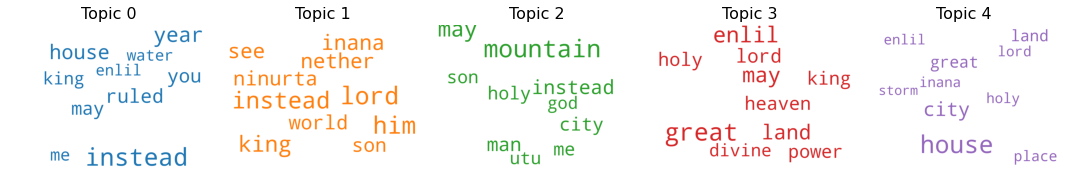

In [85]:
from matplotlib import pyplot as plt
from wordcloud import WordCloud
import matplotlib.colors as mcolors

cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

cloud = WordCloud(stopwords=set(stop),
                  background_color='white',
                  width=2500,
                  height=1800,
                  max_words=30,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)

topics = lda_model.show_topics(formatted=False)

fig, axes = plt.subplots(1, 5, figsize=(15,15), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic_words = dict(topics[i][1])
    cloud.generate_from_frequencies(topic_words, max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=16))
    plt.gca().axis('off')


plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.savefig("Topics", format='png', dpi=150, bbox_inches='tight')
plt.show()

### 6. Tokenizing the corpus

In [42]:
import torchtext
import torch
from torchtext.data.utils import get_tokenizer
from collections import Counter
from torchtext.vocab import Vocab
import io
from nltk.corpus import stopwords

In [43]:
tokenizer = get_tokenizer("basic_english")

In [44]:
# Counting the frequencies of words

from collections import defaultdict
frequency = defaultdict(int)
for text in etcsl_eng_cleaned:
    for token in text:
        frequency[token] += 1

#print(frequency)

In [43]:
# Only keep words that appear more than once
processed_corpus = [[token for token in text if frequency[token] > 1] for text in etcsl_eng_cleaned]
#processed_corpus

### 7. Building a Word2Vec-Model

In [105]:
from gensim.models.word2vec import Word2Vec, KeyedVectors

In [106]:
num_features = 300 #nr of vector elements to represent word vector
min_word_count = 3 #min nr. of word-occurences to be considered in the model
num_workers = 6 #nr of CPU cores used for training
window_size = 10 # size of the context window
subsampling = 1e-3 # subsampling rate for frequent terms

In [226]:
model = Word2Vec(
    processed_corpus,
    workers = num_workers,
    vector_size = num_features,
    min_count = min_word_count,
    window = window_size,
    sample = subsampling,
    sg =0) # hier jetzt mit skipgram (sg=1) nicht cbow (sg=0) bessere resultate in der PPt später ändern

In [202]:
model.init_sims(replace=True)

/home/nisaba/anaconda3/envs/tensor/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `init_sims` (Gensim 4.0.0 implemented internal optimizations that make calls to init_sims() unnecessary. init_sims() is now obsoleted and will be completely removed in future versions. See https://github.com/RaRe-Technologies/gensim/wiki/Migrating-from-Gensim-3.x-to-4).
  """Entry point for launching an IPython kernel.


In [227]:
model.wv.most_similar('enlil')

[('lord', 0.9970215559005737),
 ('ekur', 0.9915933609008789),
 ('god', 0.9891536235809326),
 ('prince', 0.9863004088401794),
 ('name', 0.9855189919471741),
 ('determined', 0.98350590467453),
 ('anuna', 0.9825465083122253),
 ('august', 0.9818113446235657),
 ('ninurta', 0.9816005229949951),
 ('auspicious', 0.9801875948905945)]

In [228]:
model.wv.doesnt_match('enlil beer happy'.split())

'enlil'

In [205]:
model.wv.doesnt_match('enlil beer happy feast'.split())

'beer'

In [206]:
model.wv.doesnt_match('enki beer drunk feast'.split())

'enki'

In [207]:
model.wv.most_similar('underworld')

[('descended', 0.7736420631408691),
 ('underworldshe', 0.7529351711273193),
 ('aggressively', 0.7499191761016846),
 ('doorman', 0.7453093528747559),
 ('underworldwhen', 0.7440919280052185),
 ('descend', 0.7352665662765503),
 ('fulfilled', 0.711428165435791),
 ('must', 0.7067078948020935),
 ('removed', 0.7044411897659302),
 ('ganzer', 0.704321026802063)]

In [209]:
model.wv.most_similar('child')

[('wife', 0.8929081559181213),
 ('annoyed', 0.8007286190986633),
 ('married', 0.791897177696228),
 ('favourite', 0.7866917252540588),
 ('estate', 0.7798298001289368),
 ('mother', 0.7783203125),
 ('nursemaid', 0.7570686340332031),
 ('show', 0.7345457077026367),
 ('orphan', 0.7270334959030151),
 ('all', 0.7247573137283325)]

In [210]:
model.wv.doesnt_match('love child happy marriage'.split())

'child'

In [211]:
model.wv.doesnt_match('wife husband happy beer'.split())

'beer'

In [212]:
model.wv.doesnt_match('bride bridegroom happy beer'.split())

'beer'

In [214]:
model.wv.doesnt_match('enlil utu inana suen'.split())

'inana'

In [215]:
model.wv.doesnt_match('fate sun war moon'.split())

'fate'

In [229]:
model.wv.doesnt_match('enlil beer happy feast'.split())

'enlil'

In [216]:
model.wv.most_similar('bridegroom')

[('amauum', 0.9549537301063538),
 ('seeking', 0.9119068384170532),
 ('rocking', 0.9111891984939575),
 ('churn', 0.9107898473739624),
 ('cream', 0.9060648679733276),
 ('pat', 0.8990007638931274),
 ('arrive', 0.8931204080581665),
 ('marriage', 0.8904072046279907),
 ('churning', 0.8859663009643555),
 ('sweetest', 0.8852571249008179)]

In [217]:
model.wv.most_similar('bride')

[('motherthe', 0.9719243049621582),
 ('listen', 0.9699758887290955),
 ('traveller', 0.9664252996444702),
 ('dear', 0.9647030830383301),
 ('visit', 0.9593812227249146),
 ('too', 0.9592249989509583),
 ('wetnurse', 0.9578545689582825),
 ('searched', 0.9566705226898193),
 ('vagina', 0.9562070965766907),
 ('umul', 0.9556848406791687)]

In [218]:
model.wv.most_similar(positive = ['bau', 'goddess'], negative = ['woman'])

[('protective', 0.770555853843689),
 ('residence', 0.7403934001922607),
 ('beneficent', 0.7374826669692993),
 ('etarsirsir', 0.7363789677619934),
 ('favourable', 0.7267823219299316),
 ('attend', 0.7260935306549072),
 ('excels', 0.7113865613937378),
 ('determine', 0.7091817855834961),
 ('pray', 0.7049838304519653),
 ('honour', 0.7044999003410339)]

In [219]:
model.wv.most_similar(positive = ['ninurta', 'battle'], negative = ['man'])

[('raging', 0.744818925857544),
 ('overpowering', 0.7352409958839417),
 ('disobedient', 0.7351247668266296),
 ('deluge', 0.7280343174934387),
 ('roaring', 0.7239965200424194),
 ('nergal', 0.7204716205596924),
 ('furious', 0.7190288305282593),
 ('confident', 0.7165652513504028),
 ('mace', 0.716361939907074),
 ('rival', 0.7098639607429504)]

In [224]:
model.wv.most_similar(positive = ['enlil', 'woman'], negative = ['god'])

[('belonging', 0.6563403010368347),
 ('ninlil', 0.6294081211090088),
 ('nunbaregunu', 0.6272519826889038),
 ('respectful', 0.6260708570480347),
 ('old', 0.6108096241950989),
 ('favourite', 0.593724250793457),
 ('i', 0.5876545906066895),
 ('motherinlaw', 0.5874070525169373),
 ('using', 0.5822268724441528),
 ('restrain', 0.5803148746490479)]

In [225]:
model.wv.similar_by_word('war')

[('howled', 0.9795037508010864),
 ('torrent', 0.9635899066925049),
 ('skull', 0.9634288549423218),
 ('elamite', 0.9624453186988831),
 ('reduce', 0.9623149037361145),
 ('devours', 0.9603639841079712),
 ('dashing', 0.9585620164871216),
 ('prey', 0.958200216293335),
 ('penetrate', 0.9581695795059204),
 ('trampling', 0.9580862522125244)]

In [221]:
model.wv.most_similar('love')

[('kindly', 0.8970959186553955),
 ('tenderly', 0.8908159732818604),
 ('merciful', 0.8743406534194946),
 ('address', 0.8728805780410767),
 ('soninlaw', 0.871001124382019),
 ('pray', 0.8709560632705688),
 ('blessed', 0.8678686618804932),
 ('fortune', 0.8666272163391113),
 ('aid', 0.8655128479003906),
 ('ninnibru', 0.8646423816680908)]

In [222]:
model.wv.most_similar('anzud')

[('nest', 0.8620233535766602),
 ('bird', 0.83009934425354),
 ('wing', 0.8254890441894531),
 ('fly', 0.8071162700653076),
 ('fledgling', 0.8050667643547058),
 ('trunk', 0.8042817115783691),
 ('talon', 0.8041503429412842),
 ('pigeon', 0.7996312975883484),
 ('suspended', 0.7884105443954468),
 ('sharptoothed', 0.7823557257652283)]

In [223]:
model.wv.most_similar(positive = ['sumer', 'heaven'], negative = ['god'])

[('cosmic', 0.5958895087242126),
 ('rulership', 0.5827146768569946),
 ('widespread', 0.5713990330696106),
 ('rose', 0.5614414215087891),
 ('gutium', 0.5598846673965454),
 ('akkad', 0.5567933320999146),
 ('advocate', 0.5566021203994751),
 ('guide', 0.5519148707389832),
 ('subtlety', 0.5507349967956543),
 ('radiates', 0.5476745367050171)]

In [119]:
model.wv.most_similar('beer')

[('pour', 0.9994734525680542),
 ('honey', 0.9992457032203674),
 ('lamb', 0.9988067150115967),
 ('eats', 0.9987311363220215),
 ('poured', 0.9985946416854858),
 ('butter', 0.9985681772232056),
 ('marsh', 0.9985242486000061),
 ('planted', 0.9984870553016663),
 ('little', 0.9984645247459412),
 ('small', 0.9983784556388855)]

In [166]:
model.wv.most_similar('larsam')

[('isin', 0.9993666410446167),
 ('akkadian', 0.9991326332092285),
 ('he', 0.999085009098053),
 ('gloss', 0.9990196228027344),
 ('scholar', 0.9989835023880005),
 ('uet', 0.9989309310913086),
 ('sage', 0.9988864660263062),
 ('third', 0.9988606572151184),
 ('forever', 0.9988553524017334),
 ('sunlight', 0.9988430142402649)]

In [121]:
model.wv.similar_by_word('gilgame')

[('servant', 0.9990004897117615),
 ('version', 0.9989906549453735),
 ('ibierra', 0.9989681243896484),
 ('by', 0.9989288449287415),
 ('concerning', 0.9987871646881104),
 ('aradu', 0.998780369758606),
 ('pas', 0.9987272024154663),
 ('palace', 0.9986942410469055),
 ('lot', 0.998569905757904),
 ('overseer', 0.9985324144363403)]

In [122]:
model.wv.most_similar('queen')

[('ningal', 0.9990127086639404),
 ('spouse', 0.9989001750946045),
 ('wish', 0.9984579682350159),
 ('mound', 0.9983469843864441),
 ('travel', 0.9983463287353516),
 ('beautiful', 0.998319149017334),
 ('ema', 0.9982378482818604),
 ('righteous', 0.9981252551078796),
 ('rejoice', 0.9979919791221619),
 ('maiden', 0.9978923201560974)]

In [174]:
model.wv.most_similar(positive = ['enlil'], negative = ['man'])

[('deciding', 0.8009812831878662),
 ('headgear', 0.643962025642395),
 ('ninmena', 0.6206985712051392),
 ('divine', 0.6100849509239197),
 ('power', 0.6082683801651001),
 ('below', 0.5763962864875793),
 ('earth', 0.5612967610359192),
 ('heaven', 0.5298845171928406),
 ('conquer', 0.5263440608978271),
 ('instruct', 0.49614909291267395)]

In [199]:
model.wv.most_similar(positive = ['king', 'woman'], negative = ['man'])

[('chose', 0.9678337574005127),
 ('lord', 0.9564954042434692),
 ('ambitious', 0.9556412696838379),
 ('land', 0.9482659697532654),
 ('kingship', 0.9480852484703064),
 ('unchangeable', 0.9447059631347656),
 ('determine', 0.9393962025642395),
 ('determined', 0.9366124868392944),
 ('fifty', 0.934846043586731),
 ('destiny', 0.9346879720687866)]

In [126]:
model.save('etcsl.bin')

In [127]:
model = Word2Vec.load('etcsl.bin')

### 8. Plotting graphs of the semantic relationships

In [62]:
from sklearn.manifold import TSNE

In [63]:
vocab = list(model.wv.key_to_index)
X = model.wv[vocab]

In [64]:
tsne = TSNE(n_components=3)
X_tsne = tsne.fit_transform(X)

In [65]:
df = pd.DataFrame(X_tsne, index=vocab, columns=['x', 'y', 'z'])


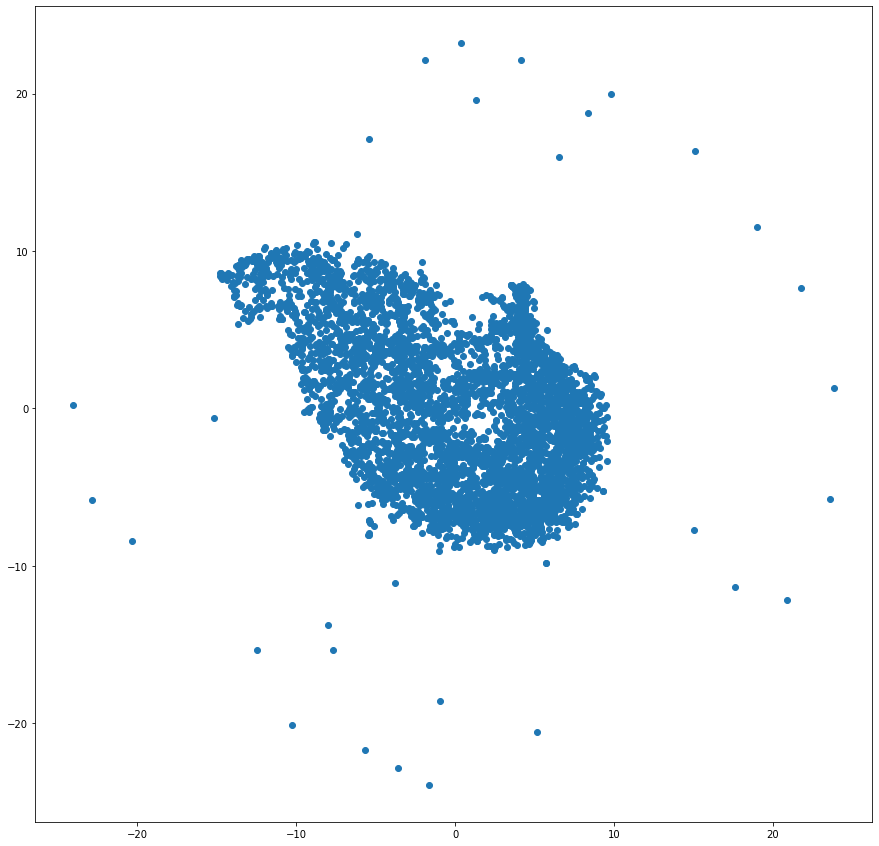

In [67]:
fig = plt.figure(figsize=(15, 15))

ax = fig.add_subplot(1, 1, 1)
ax.scatter(df['x'], df['y'])
plt.savefig("T_SNE_scatter.png", format='png', dpi=150, bbox_inches='tight')
plt.show()

In [68]:
#T-distributed Stochastic Neighbor Embedded- (T-SNE) Plot
import numpy as np
from sklearn.manifold import TSNE
from matplotlib import pyplot as plt

In [69]:
def tsne_plot(model):
    "Creates and TSNE model and plots it"
    labels = []
    tokens = []

    for word in model.wv.key_to_index:
        tokens.append(model.wv[word])
        labels.append(word)
    
    tsne_model = TSNE(perplexity=30, n_components=3, init='pca', n_iter=2500, random_state=10)
    new_values = tsne_model.fit_transform(tokens)

    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])
        
    plt.figure(figsize=(20, 20)) 
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
    plt.savefig("T_SNE.png", format='png', dpi=150, bbox_inches='tight')
    plt.show()

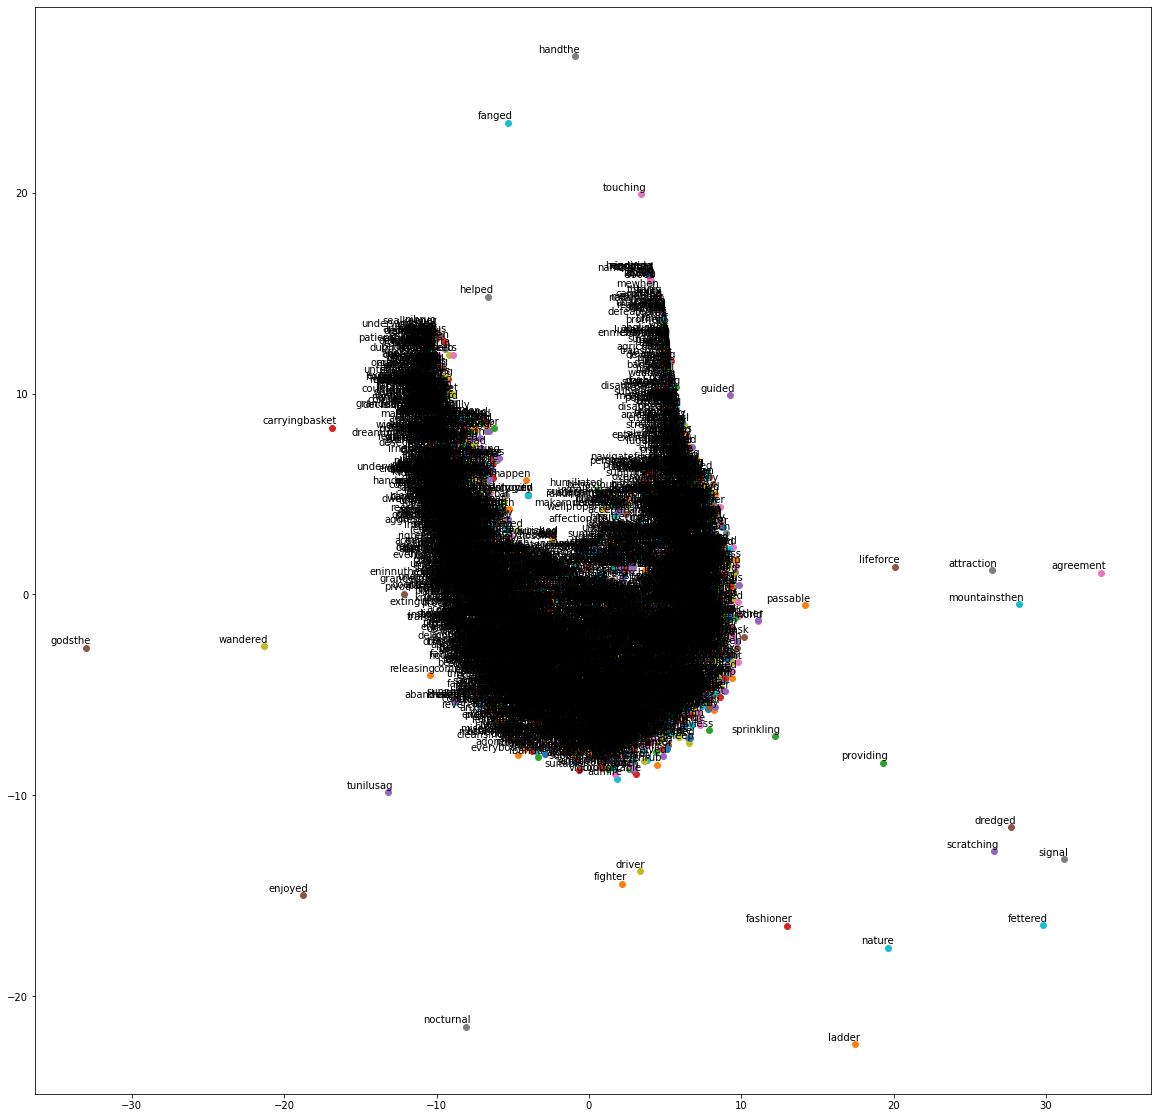

In [70]:
tsne_plot(model)

In [71]:


"Creates and TSNE model and plots it"
labels = []
tokens = []

for word in model.wv.key_to_index:
    tokens.append(model.wv[word])
    labels.append(word)
    
tsne_model = TSNE(perplexity=30, n_components=3, init='pca', n_iter=2500, random_state=10)
new_values = tsne_model.fit_transform(tokens)

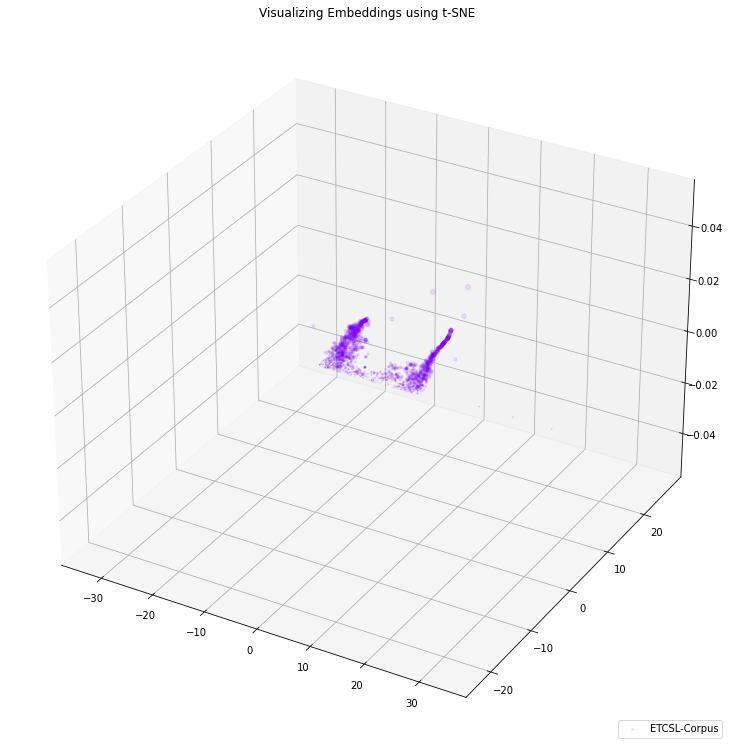

In [75]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.cm as cm

def tsne_plot_3d(title, label, embeddings, a=1):
    fig = plt.figure(figsize=(10, 10))
    ax = Axes3D(fig)
    colors = cm.rainbow(np.linspace(0, 1, 1))
    plt.scatter(embeddings[:, 0], embeddings[:, 1], embeddings[:, 1], c=colors, alpha=a, label=label)
    plt.legend(loc=4)
    plt.title(title)
    plt.savefig("T_SNE_3D.png", format='png', dpi=150, bbox_inches='tight')
    plt.show()


tsne_plot_3d('Visualizing Embeddings using t-SNE', 'ETCSL-Corpus', new_values, a=0.1)

